In [52]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from HMMClassifier import HHMClassifier
from HMMClassifier import SignalManager
from myutils import rename_path_for_train
from sklearn.metrics import f1_score
import pandas as pd
%matplotlib inline
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
def abnormals_insert(signal,size = 40):
    t = signal.copy()
    start = np.random.randint(0,len(signal) - size,)
    m = np.random.uniform(min(signal),max(signal))
    sigma = 0.3
    t[start:start+size] = np.random.normal(m,sigma,size)
    return t

In [54]:
signal_manager = SignalManager()
signal_manager.read_paramets('/home/kirilman/Projects/nir/nir/notebooks/Different model/config.json')

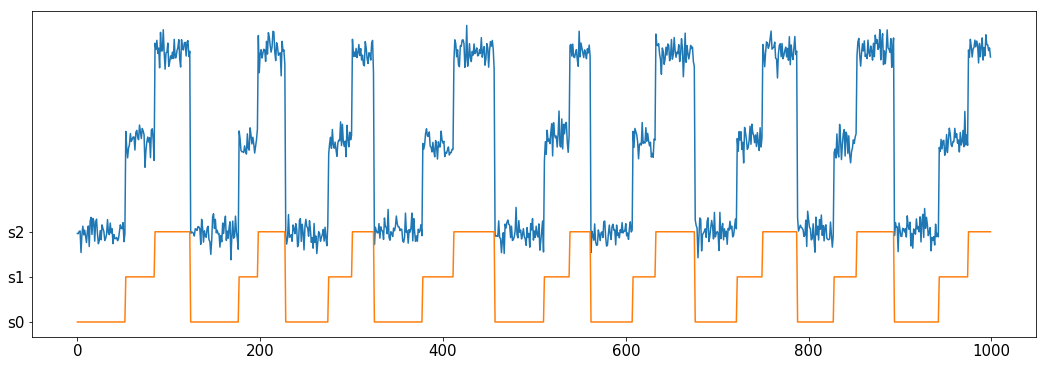

In [55]:
train_signal = signal_manager.generators[0].sequence
path = signal_manager.generators[0].path
path = myutils.rename_path_for_train(path)
plt.plot(train_signal)
plt.plot(path)

In [27]:
N = signal_manager.parameters[0]['n_comp']
print(N)
model = HiddenMarkovModel.from_samples(NormalDistribution,n_components = N,X=[train_signal])
# model = HiddenMarkovModel.from_samples(NormalDistribution,n_components = N,X=[train_signal],
#                                        labels = [path],algorithm = 'labeled')

3


In [28]:
log_prob_normal = model.log_probability(train_signal)
print(log_prob_normal)

86.06488149629985


### Подготовка тестового набора сигналов

1000 1000


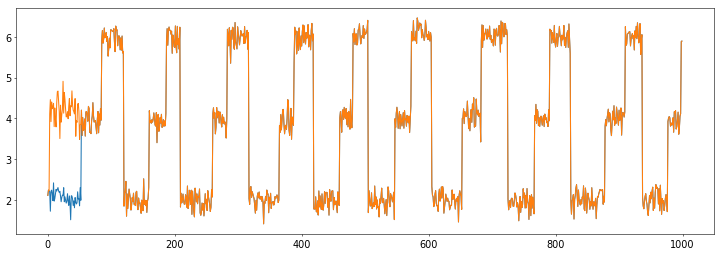

In [29]:
x_test = []
y_true = np.array([0]*500+[1]*500)
for i in range(500):
    x_test +=[signal_manager.generators[0].generate_signal()]
for i in range(500):
    x_test +=[abnormals_insert(x_test[i],50)]
print(len(x_test),len(x_test[0]))
fig = plt.figure(dpi = 50)
plt.plot(x_test[12])
plt.plot(x_test[512])

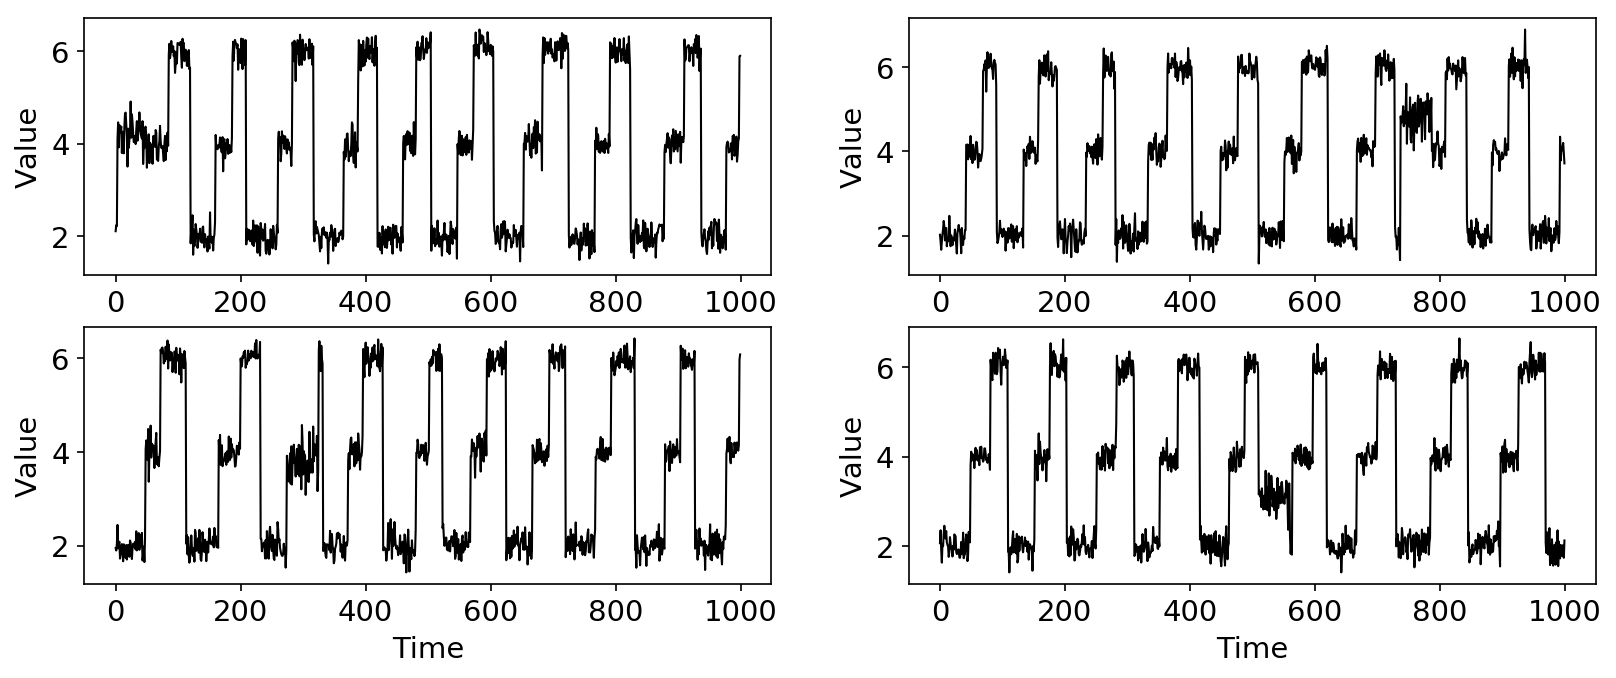

In [30]:
fig,ax = plt.subplots(2,2,figsize = (13,5),dpi = 150)
ax[0,0].plot(x_test[512],'black',linewidth='1')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Value')

ax[0,1].plot(x_test[612],'black',linewidth='1')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Value')

ax[1,0].plot(x_test[622],'black',linewidth='1')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Value')

ax[1,1].plot(x_test[862],'black',linewidth='1')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Value')
plt.savefig('Abnormal_signal_with_insert.jpeg',dpi=300)

In [42]:
lvl = 0.5
lvls = [0.1,0.2,0.3,0.4, 0.5]

for lvl in lvls:
    score = []
    likes = []
    y_pred = np.zeros(shape=(len(x_test),1))
    low = log_prob_normal*(1-lvl)
    high = log_prob_normal*(1+lvl)
    for i,signal in enumerate(x_test):
        p = model.log_probability(signal)
        score += [p]
        if low < p <high:
            likes += [signal]
            y_pred[i] = 0
        else:
            y_pred[i] = 1
        if len(signal)>1000:
            print('l=',len(signal))
    print(f1_score(y_true, y_pred))

    fig = plt.figure(figsize=(6,5),dpi=120)
#     print(score[500:505])
    n, bins, patches = plt.hist(score[:500], 10, normed=1, facecolor='blue',rwidth=0.9)
    n, bins, patches = plt.hist(score[500:], 50, normed=1, facecolor='red',rwidth=0.9, alpha = 0.9)
#     fig.savefig('hist'+str(lvl)+'.jpeg',dpi=120)
    plt.close('all')
# for i in range(100):
#     abnormal = abnormals_insert(signal_manager.generators[0].get_abnormal_signal())
#     abnormals +=[abnormal]
#     p = model.log_probability(abnormal)
#     score += [p]
#     if p > a:
#         likes += [abnormal]
        

0.7098150782361309


/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


0.7532075471698114


/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


0.7942353883106484


/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


0.8347529812606473


/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


0.8795620437956205


/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [43]:
s = np.array(x_test[500:])
t = s[np.array(score[500:])>log_prob_normal]
plt.plot(t[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

0.5
404


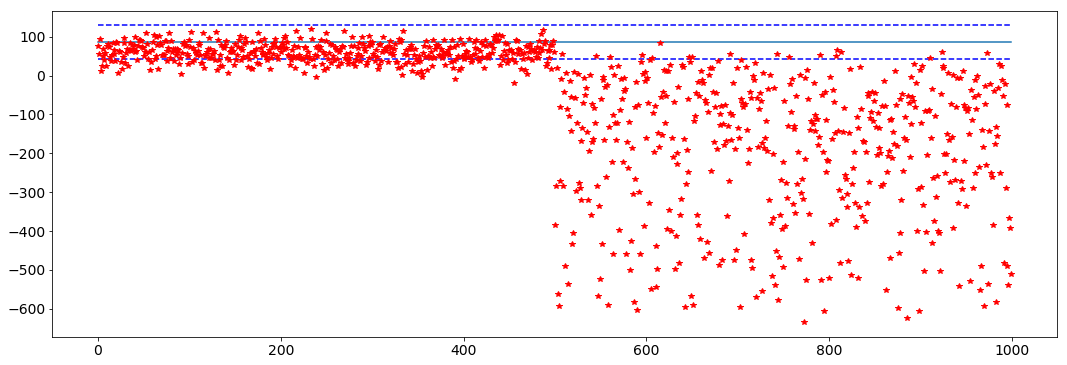

In [44]:
print(lvl)
fig = plt.figure()
plt.plot([log_prob_normal]*len(score))
plt.plot([low]*len(score),'b--')
plt.plot([high]*len(score),'b--')

plt.plot(score,'r*')
# plt.plot(y_pred*100)
print(len(likes))

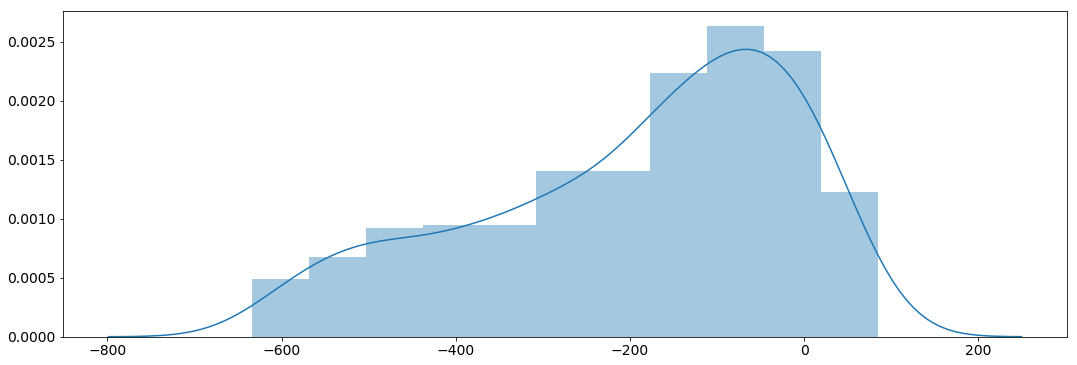

In [45]:
import seaborn as sns
# sns.distplot(score[:500],kde=False)
sns.distplot(score[500:],norm_hist=True)

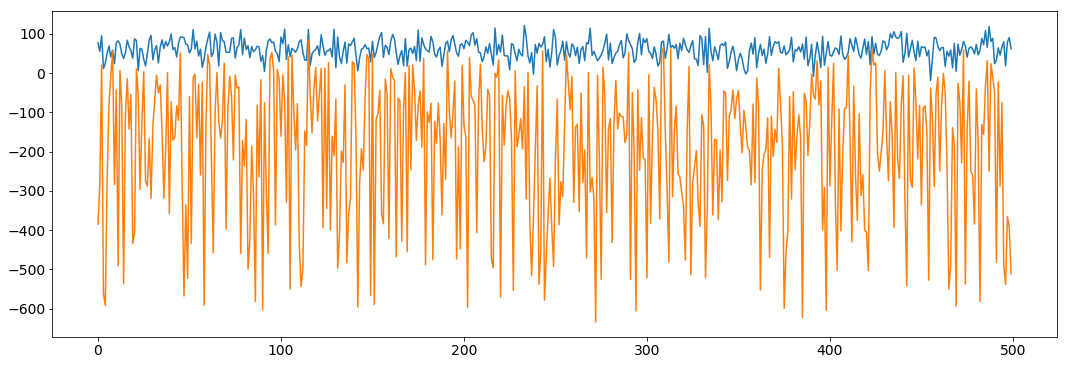

In [46]:
plt.plot(score[:500])
plt.plot(score[500:])

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


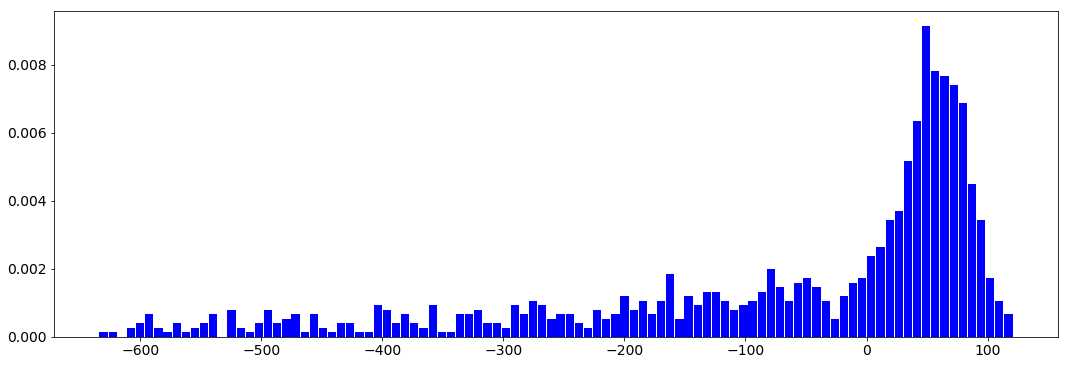

In [47]:
n, bins, patches = plt.hist(score, 100, normed=1, facecolor='blue',rwidth=0.9)

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


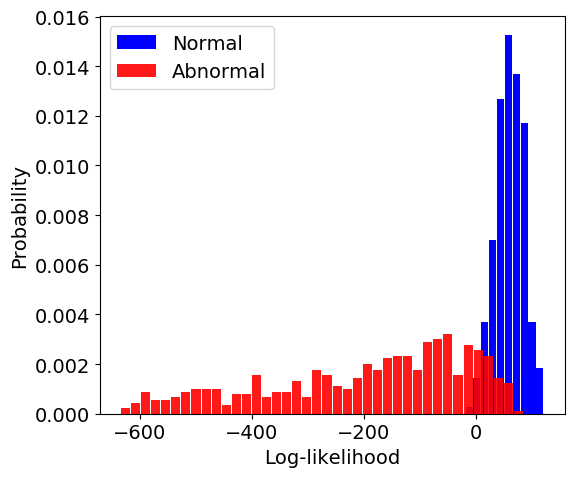

In [51]:
fig = plt.figure(figsize=(6,5),dpi=100)
plt.rcParams.update({'font.size': 14})
n, bins, patches = plt.hist(score[:500], 10, normed=1, facecolor='blue',rwidth=0.9,label = 'Normal')
n, bins, patches = plt.hist(score[500:], 40, normed=1, facecolor='red',rwidth=0.9, alpha = 0.9, label='Abnormal')
plt.legend()
plt.xlabel('Log-likelihood')
plt.ylabel('Probability')
plt.tight_layout()
plt.savefig('Histogram.jpeg',dpi=300)

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


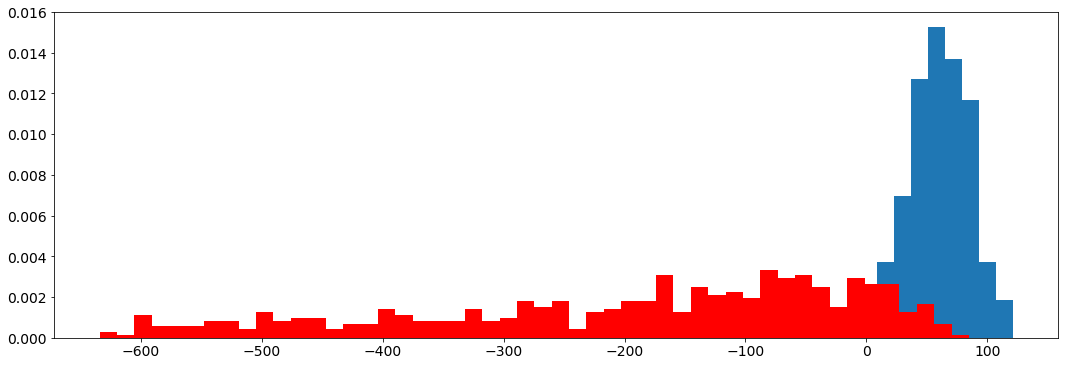

In [38]:
plt.hist(score[:500],10,normed=True);
plt.hist(score[500:],50,color='r',normed=True);

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


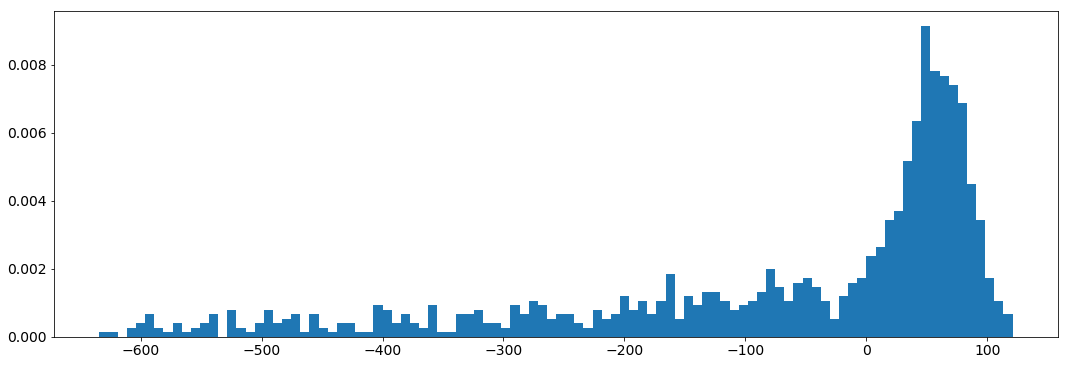

In [39]:
plt.hist(score,100,normed=True);

In [40]:
f1_score(y_true, y_pred)

0.7942353883106484

In [ ]:
s = abnormals_insert(signal,50,)
plt.plot(s,'r')
plt.plot(signal,'b')

In [ ]:
for s in likes:
    fig,ax = plt.subplots(2,1, dpi = 150)
    ax[0].plot(s)
    ax[1].plot(signal,'r')

In [ ]:
for i,s in enumerate(likes):
    fig,ax = plt.subplots(1,1, dpi = 150,figsize=(18,3))
    ax.plot(s)
    ax.set_title(str(i))
    ax.plot(signal,'r')

In [ ]:
plt.plot(abnormals[55])

In [ ]:
t = abnormals[15].copy()
size = 40
start = np.random.randint(0,len(signal) - size,)
# t[start:start+size] = np.random.uniform(0,max(signal),size)
t[start:start+size] = np.random.uniform(max(signal-np.std(signal)),max(signal),size)
print(len(t[start:start+size]))
plt.plot(t)
# plt.plot(s)
print(model.log_probability(t))

In [ ]:
size = 25
start = np.random.randint(0,len(signal) - size,)
start

In [ ]:
def l(a):
    a = np.array(a).copy()
    return np.sqrt(np.sum(a*a))
def cor(a,b, grad=False):
    a = np.array(a).copy()
    b = np.array(b).copy()
    t = np.abs(np.sum(a*b))/(l(a)*l(b))
#     print(t)
    if grad == True:
        return np.arccos(t)*180/np.pi
    else:
        return np.arccos(t)

In [ ]:
l([0,4,0])

In [ ]:
v = np.array([3,1,-1])
v1 = np.array([-2,2,-1])
cor(v,v1)

In [ ]:
one = [[-2,-2,-2],[2,0,-5],[2,0,1]]
two = [[2,-3,2],[1,-2,1],[2,0,-1]]
two = [[2,2,2],[-2,0,-5],[3,1,-1]]

In [ ]:
cicle = np.zeros((3,3))
for i,a in enumerate(one):
    for k,b in enumerate(two):
        cicle[i,k] = cor(a,b,True)
cicle

In [ ]:
a = 60
b = 40

In [ ]:
60/40*100